# Importing the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('customers.csv')

In [3]:
data.head()

Channel  Region  Fresh  Milk  Grocery  Frozen  Detergents_Paper  \
0        2       3  12669  9656     7561     214              2674   
1        2       3   7057  9810     9568    1762              3293   
2        2       3   6353  8808     7684    2405              3516   
3        1       3  13265  1196     4221    6404               507   
4        2       3  22615  5410     7198    3915              1777   

   Delicatessen  
0          1338  
1          1776  
2          7844  
3          1788  
4          5185

In [4]:
data.shape

(440, 8)

## Attribute Information

Fresh: annual spending (m.u.) on fresh products (Continuous)
    
Milk: annual spending (m.u.) on milk products (Continuous)

Grocery: annual spending (m.u.) on grocery products (Continuous)
    
Frozen: annual spending (m.u.) on frozen products (Continuous)
    
Detergents_Paper: annual spending (m.u.) on detergents and paper products (Continuous)
    
Delicatessen: annual spending (m.u.) on and delicatessen products (Continuous)

# EDA

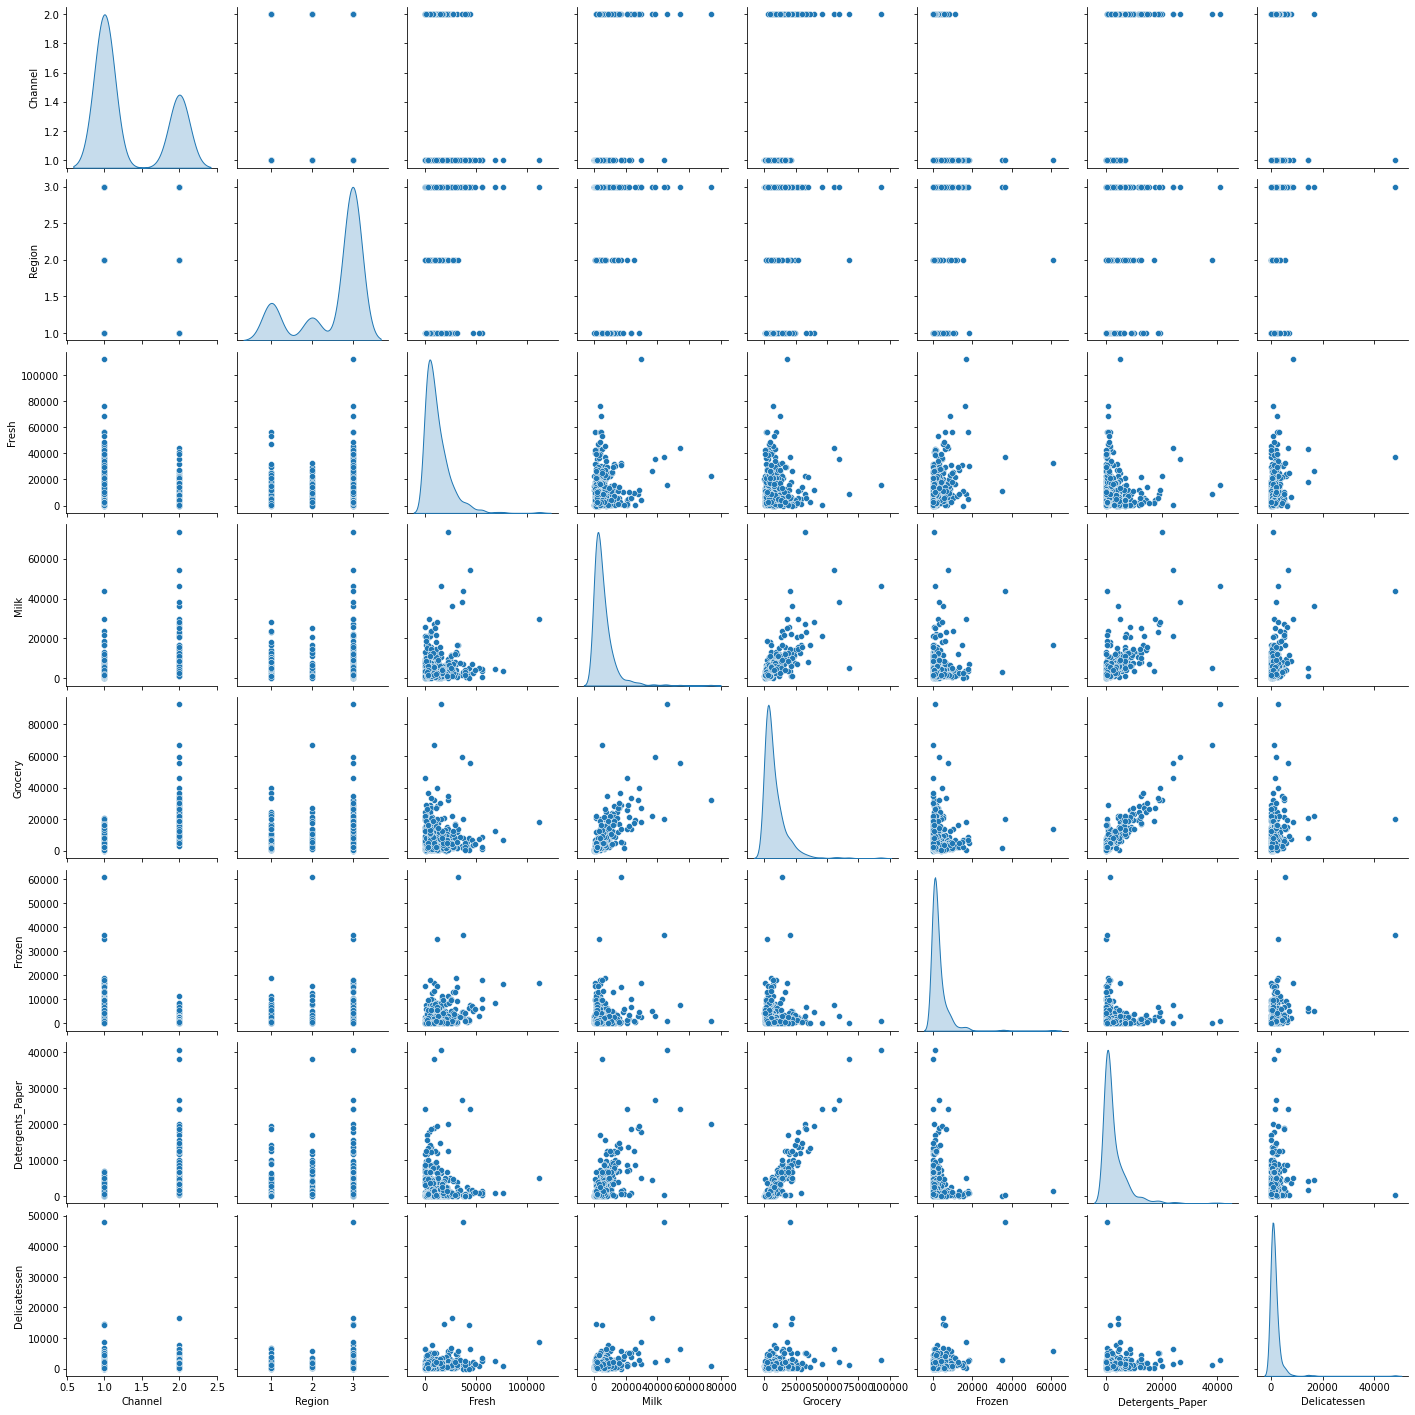

In [5]:
sns.pairplot(data, diag_kind='kde')

In [6]:
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

The data for every category is highly skewed (right skewed). If data is not normally distributed, especially if the mean and median vary significantly, it is most appropriate to apply a non-linear scaling. One way to achieve this scaling is by applying the natural logarithm.

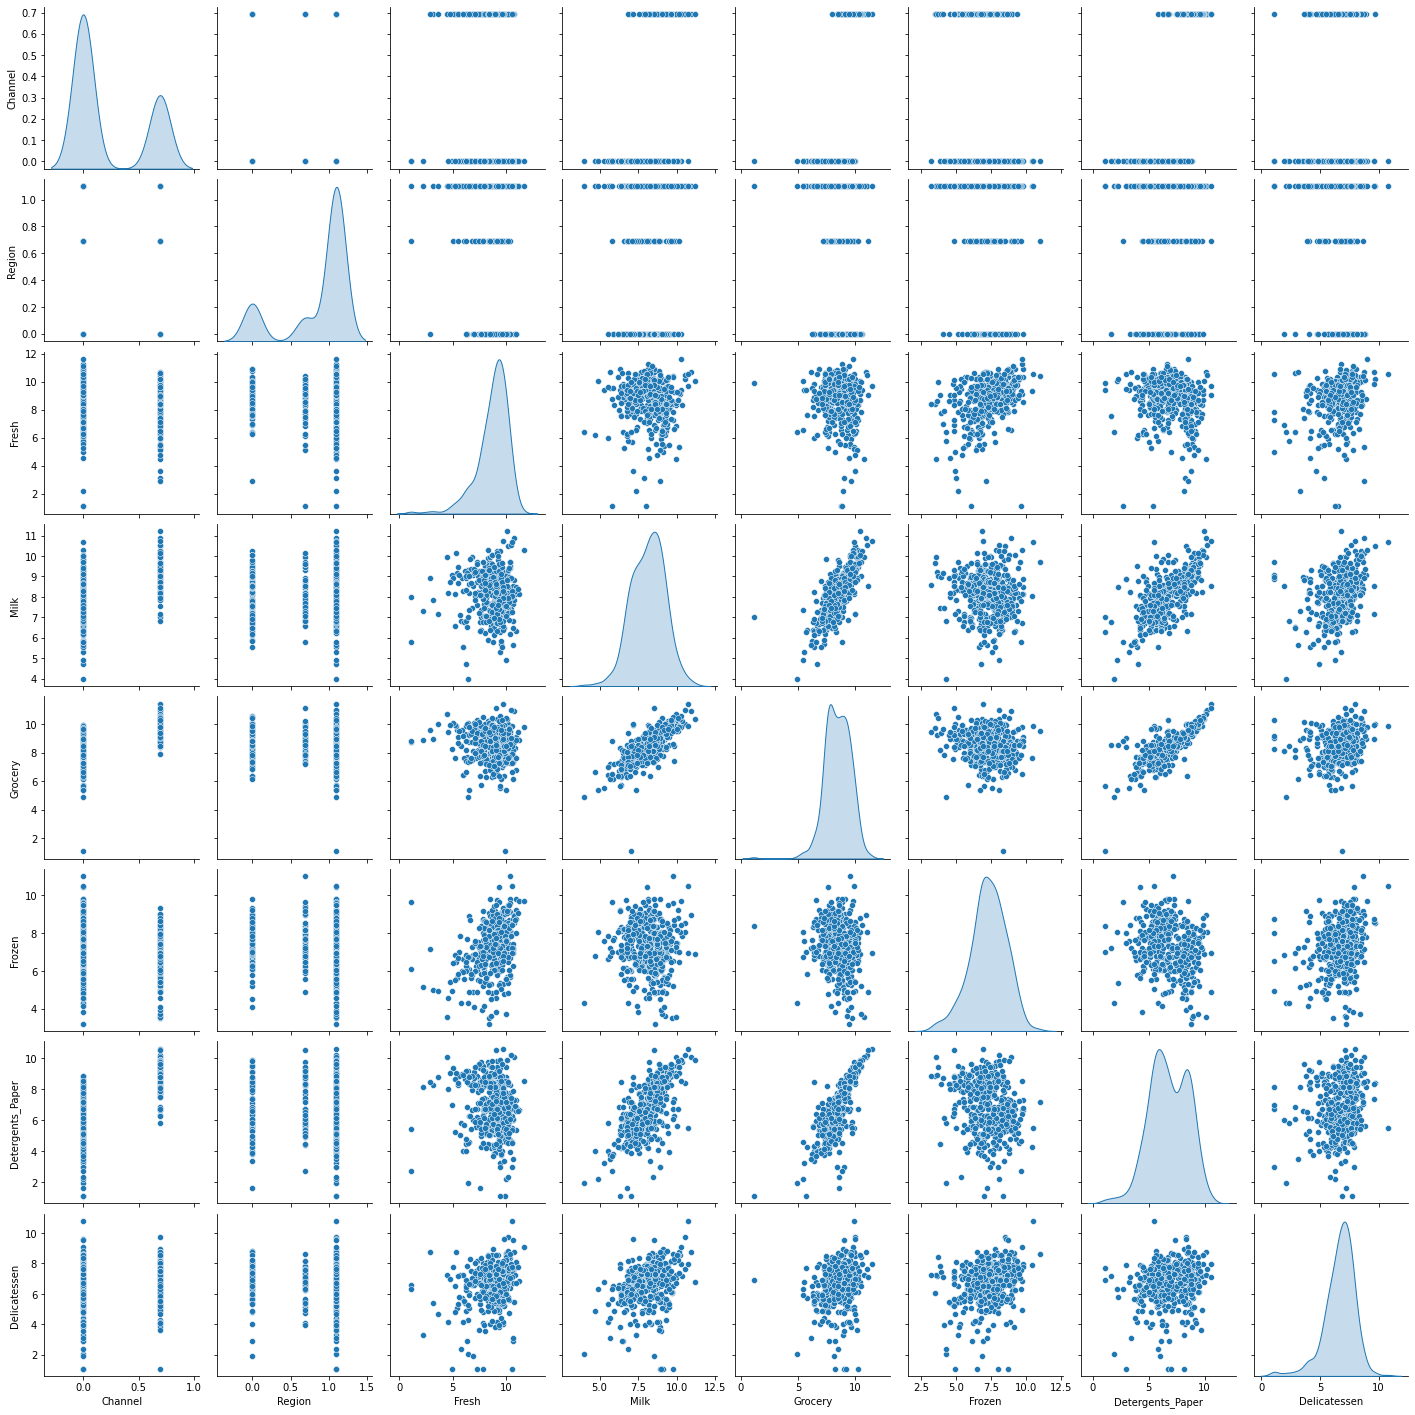

In [7]:
log_data = data.applymap(np.log)

sns.pairplot(log_data, diag_kind='kde')

Now the distrbution for each category has become more or less normal.

In [8]:
log_data = log_data.drop(['Channel', 'Region'], axis=1)

In [9]:
# for feature in log_data.keys():
#     Q1 = np.percentile(data[feature],25)
#     Q3 = np.percentile(data[feature],75)
#     IQR = Q3 - Q1

#     lower_limit = Q1 - 1.5*IQR
#     upper_limit = Q3 + 1.5*IQR

In [10]:
# log_data = log_data[(log_data[feature] >= lower_limit) & (log_data[feature] <= upper_limit)]

# Handling Outliers

In [11]:
Q1 = np.percentile(log_data['Delicatessen'],25)
Q3 = np.percentile(log_data['Delicatessen'],75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [12]:
log_data = log_data[(log_data['Delicatessen'] >= lower_limit) & (log_data['Delicatessen'] <= upper_limit)]

In [13]:
log_data.shape

(426, 6)

In [14]:
Q1 = np.percentile(log_data['Fresh'],25)
Q3 = np.percentile(log_data['Fresh'],75)
IQR = Q3 - Q1

lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [15]:
log_data = log_data[(log_data['Fresh'] >= lower_limit) & (log_data['Fresh'] <= upper_limit)]

In [16]:
log_data.shape

(409, 6)

# Scaling

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
scaler = StandardScaler()

In [19]:
scaled_data = scaler.fit_transform(log_data)

In [20]:
scaled_data

array([[ 0.45463039,  1.01024337,  0.48080663, -1.62085527,  0.66812086,
         0.37981615],
       [-0.08442986,  1.02538139,  0.69496898,  0.0840224 ,  0.79200798,
         0.65255847],
       [-0.18124702,  0.92230233,  0.49548628,  0.33560234,  0.83099349,
         2.08315537],
       ...,
       [ 0.58095837,  1.46228135,  1.7418891 , -1.043494  ,  1.68779425,
         0.70068457],
       [ 0.26302308, -0.50518356, -0.62912376, -0.34389245, -0.97838421,
         0.82534916],
       [-0.94032404, -0.65266297, -0.52233884, -2.58446654, -0.35749994,
        -2.74808059]])

In [21]:
scaled_data = pd.DataFrame(scaled_data, columns=log_data.columns)

Now we'll use Principal Component Analysis (PCA) to calculate the dimensions which best maximize variance and we will find which combinations of features best describe the customers.

# Principle Component Analysis

In [22]:
from sklearn.decomposition import PCA

In [23]:
pca = PCA(n_components=6)

In [24]:
pca = pca.fit(scaled_data)

In [25]:
explained_variance = pca.explained_variance_ratio_

In [26]:
cumulative_variance = np.cumsum(explained_variance)

In [27]:
import plotly.graph_objects as go

fig = go.Figure()

fig.add_trace(
    go.Scatter(
        x=list(range(1,7)),
        y=cumulative_variance,
        marker=dict(size=15, color="LightSeaGreen")
    ))

fig.add_trace(
    go.Bar(
        x=list(range(1,7)),
        y=explained_variance,
        marker=dict(color="RoyalBlue")
    ))
# plt.xlabel('% explained variance')
# plt.ylabel('Number of principal components')

In [28]:
pca = PCA(n_components=2)

In [29]:
reduced_data = pca.fit_transform(scaled_data)

In [30]:
reduced_data = pd.DataFrame(reduced_data, columns=['PC1', 'PC2']).values

In [31]:
reduced_data

array([[-1.46277830e+00, -4.92380300e-01],
       [-1.54493469e+00,  3.34559915e-01],
       [-1.74161881e+00,  1.13064383e+00],
       [ 7.52035094e-01,  1.25861750e+00],
       [-9.96238261e-01,  1.87895101e+00],
       [-9.71925690e-01, -5.44873850e-02],
       [-5.90163788e-01, -6.57734946e-01],
       [-1.27719366e+00,  4.68172623e-01],
       [-5.41922704e-01, -9.11535076e-01],
       [-2.31780184e+00,  8.18057660e-02],
       [-1.52995331e+00,  2.73056721e-01],
       [ 8.82550907e-01, -1.08405967e-01],
       [-2.04188275e+00,  5.39257913e-01],
       [-1.36469786e+00,  6.21128260e-01],
       [-1.94286793e+00,  2.26837543e-01],
       [ 6.88529378e-01, -9.94825369e-01],
       [-1.98799281e+00, -2.26964501e+00],
       [-3.10671711e-01,  4.10369452e-01],
       [-1.34662919e+00,  1.24052263e+00],
       [-5.19930724e-01, -7.90817659e-01],
       [-6.80589837e-01,  6.42014616e-01],
       [ 1.55845425e+00, -9.84868500e-02],
       [-1.44944588e-01,  2.29627522e+00],
       [-3.

# Clustering

In [32]:
from sklearn.cluster import KMeans

In [33]:
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(reduced_data)
    wcss.append(kmeans.inertia_)

Text(0, 0.5, 'WCSS')

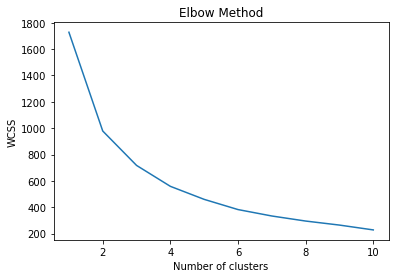

In [34]:
plt.plot(range(1,11),wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')

From the elbow method curve, number of clusters should be 2

In [35]:
kmeans = KMeans(n_clusters=2, random_state=42)

In [36]:
y_pred = kmeans.fit_predict(reduced_data)

In [37]:
y_pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,

# Visualization of the clusters

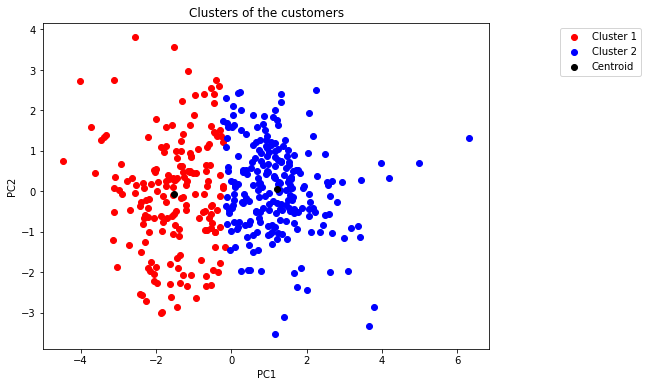

In [41]:
plt.figure(figsize=(8,6))
plt.scatter(reduced_data[y_pred==0, 0], reduced_data[y_pred==0, 1], c='red', label='Cluster 1')
plt.scatter(reduced_data[y_pred==1, 0], reduced_data[y_pred==1, 1], c='blue', label='Cluster 2')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='black', label='Centroid')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Clusters of the customers')
plt.legend(bbox_to_anchor=(1.35,1))

# Identification of the clusters

In [45]:
scaled_centers = pca.inverse_transform(kmeans.cluster_centers_)
log_centers = scaler.inverse_transform(scaled_centers)
true_centers = np.exp(log_centers)

true_centers = pd.DataFrame(true_centers, columns=log_data.columns, index=['Cluster 1', 'Cluster 2'])
true_centers

Fresh         Milk       Grocery       Frozen  \
Cluster 1  6532.622164  7943.403905  11528.113529  1170.300525   
Cluster 2  8832.109490  1707.621079   2111.704656  2018.819461   

           Detergents_Paper  Delicatessen  
Cluster 1       3523.900360   1305.820575  
Cluster 2        289.681768    674.333870

In [40]:
data.describe()

Channel      Region          Fresh          Milk       Grocery  \
count  440.000000  440.000000     440.000000    440.000000    440.000000   
mean     1.322727    2.543182   12000.297727   5796.265909   7951.277273   
std      0.468052    0.774272   12647.328865   7380.377175   9503.162829   
min      1.000000    1.000000       3.000000     55.000000      3.000000   
25%      1.000000    2.000000    3127.750000   1533.000000   2153.000000   
50%      1.000000    3.000000    8504.000000   3627.000000   4755.500000   
75%      2.000000    3.000000   16933.750000   7190.250000  10655.750000   
max      2.000000    3.000000  112151.000000  73498.000000  92780.000000   

             Frozen  Detergents_Paper  Delicatessen  
count    440.000000        440.000000    440.000000  
mean    3071.931818       2881.493182   1524.870455  
std     4854.673333       4767.854448   2820.105937  
min       25.000000          3.000000      3.000000  
25%      742.250000        256.750000    408.250000  
50%     1526.000000        816.500000    965.500000  
75%     3554.250000       3922.000000   1820.250000  
max    60869.000000      40827.000000  47943.000000

Cluster 1 has higher than average purchases in the categories of milk, grocery, and detergents and paper. Moreover, this segment seems to make more purchases in general, which suggests it might be largest establishments. These customers are likely retail chains and grocery stores. 

Cluster 2, in general, purchases less than Cluster 1. Here, a majority of the purchases are in the fresh and frozen categories and a small for grocery also, which suggest this component might possibly be restaurants that are preparing and cooking food.